### Pair Programming - Normalización de datos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:


- Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste


- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kstest

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None 


In [35]:
df = pd.read_csv("data/adult.data_limpio.csv", index_col = 0)

In [36]:
df.head(2)

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640


In [37]:
df.shape

(32560, 13)

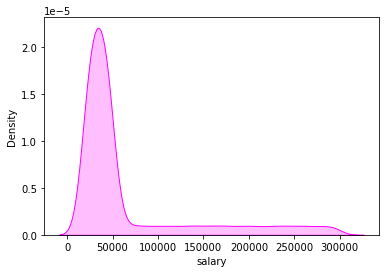

In [38]:
# Veamos si nuestra variable respuesta cumple con la asunción de normalidad visualmente 
sns.distplot(
    df["salary"], 
    hist = False, 
    color = "magenta", 
    kde_kws = {"shade": True, "linewidth": 1});

No es una campana gauss perfecta, por lo cual no son son normales. Para confirmar utilizaremos el test de Kolmogórov-Smirnov.

In [39]:
kstest(df["salary"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- El p-value de 0 nos indica que lo que habíamos observado visualmente es correcto: Rechazamos la H0 (Hipotesis nula): los datos no son normales. Procedemos a intentar normalizarla para poder hacer un modelo de regresión lineal.

1. Probamos normalización logaritmíca:

In [40]:
df["salary_log"] = df["salary"].apply(lambda x: np.log(x) if x > 0 else 0)

In [41]:
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,salary_log
39,,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006,10.086059
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640,10.706386
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011,9.798738
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747,10.300484
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350,9.870448


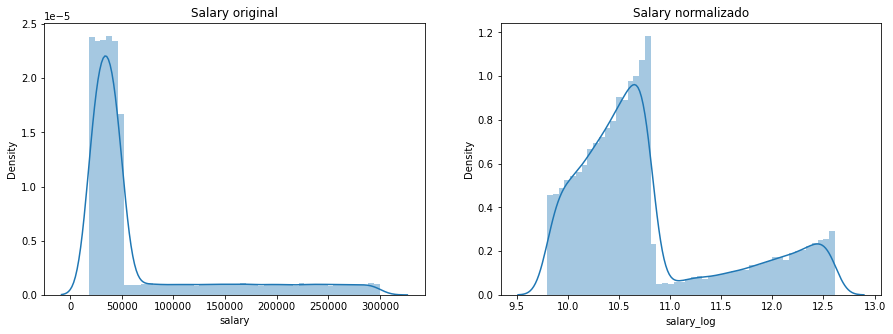

In [42]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary normalizado')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_log"], ax = axes[1]);

In [43]:
kstest(df["salary_log"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- Tras la normalización logaritmíca observamos que nuestra distribución ha cambiado pero sigue sin aproximarse a una normal. Comprobamos con el saphiro test, y concluimos que esta normalización no nos sirve para incluir la variable respuesta en un modelo de regresión lineal. 

2. Raíz cuadrada

In [44]:
df["salary_raiz"] = df["salary"].apply(lambda x: math.sqrt(x))

In [45]:
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,salary_log,salary_raiz
39,,,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006,10.086059,154.938698
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640,10.706386,211.281802
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011,9.798738,134.205067
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747,10.300484,172.473186
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350,9.870448,139.104277


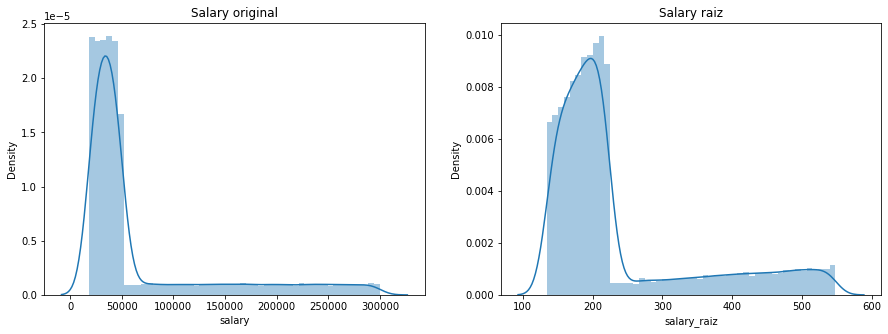

In [46]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary raiz')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_raiz"], ax = axes[1]);

In [47]:
kstest(df["salary_raiz"], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

- Nuestros resultados siguen sin ser normales tras la normalización con raíz cuadrada. Continuemos buscando un método que ajuste un poco mejor la distribución de nuestros datos. 

3. Box-cox

In [48]:
df['salary_boxcox'], lambda_ajustada = stats.boxcox(df['salary'])

In [49]:
lambda_ajustada

-0.787249856654536

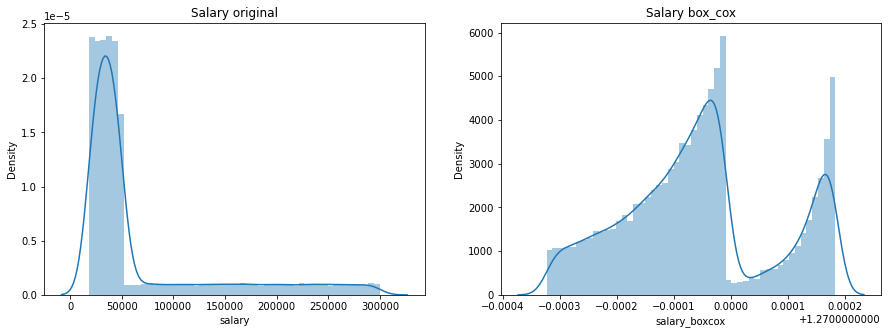

In [50]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary box_cox')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_boxcox"], ax = axes[1]);

In [51]:
kstest(df["salary_boxcox"], 'norm')

KstestResult(statistic=0.8979002003032412, pvalue=0.0)

- Tras la normalización con el método box cox nuestros datos siguen sin ser normales. 

4. MinMaxScaler

In [52]:
# extraemos las columnas numéricas
numericas = df.select_dtypes(include = np.number)

In [53]:
# construir el modelo de escalador
minmax = MinMaxScaler()

In [54]:
# ajustamos el modelo utilizando nuestro set de datos
minmax.fit(df[['salary']])

MinMaxScaler()

In [55]:
# transformamos los datos
fw_normalizadas = minmax.transform(df[["salary"]])

In [56]:
# Vamos a verificar los valores mínimos después de la normalización
fw_normalizadas.min(axis=0)

array([0.])

In [57]:
# y los máximos?
fw_normalizadas.max(axis=0)

array([1.])

In [58]:
# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_minmax = pd.DataFrame(fw_normalizadas, columns = ["salary_sklearn"])
numericas_minmax.head(2)

,salary_sklearn
0,0.021300
1,0.094478


In [59]:
# incorporamos la columna al dataframe 

df["salary_sklearn"] = numericas_minmax
df.head(2)

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary,salary_log,salary_raiz,salary_boxcox,salary_sklearn
39,,,,,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006,10.086059,154.938698,1.269792,0.028744
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640,10.706386,211.281802,1.269967,0.070394


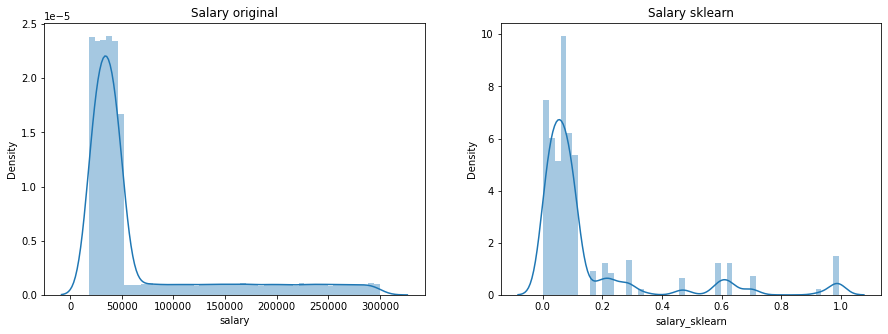

In [60]:
# ahora chequeemos si nuestra variable tiene una distribución normal

fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary sklearn')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_sklearn"], ax = axes[1]);

- Como podemos observar este método es quizás el mas desacertado de todos los que hemos utilizado. No haremos ni el test de shapiro. 

<AxesSubplot:title={'center':'Salary logaritmica'}, xlabel='salary_log', ylabel='Density'>

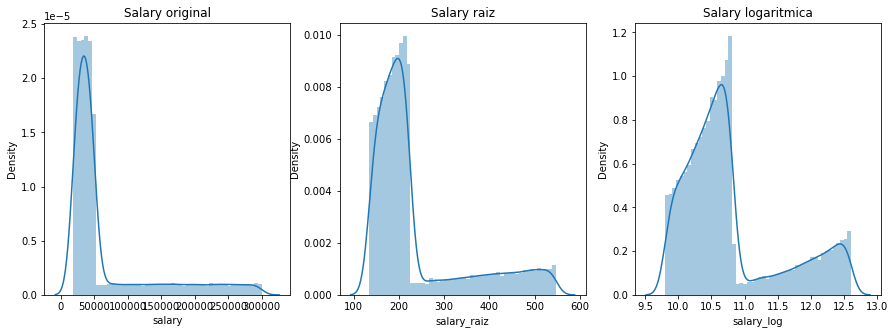

In [61]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))

axes[0].set_title('Salary original')
axes[1].set_title('Salary raiz')
axes[2].set_title('Salary logaritmica')

sns.distplot(df['salary'] ,ax = axes[0])
sns.distplot(df["salary_raiz"], ax = axes[1])
sns.distplot(df["salary_log"], ax = axes[2])

En este caso, observamos que el método más adecuado para normalizar nuestros datos sería la normalización raíz (dentro de lo que cabe), porque es la que genera una distribución más centrada. 

Sin embargo, hemos decidido no normalizar los datos y obviar todo esto.

In [62]:
lista_eliminar = ['salary_raiz','salary_boxcox', "salary_sklearn", "salary_log"]
df.drop(columns = lista_eliminar, axis = 0, inplace = True)

In [63]:
df.head()

,work_class,education,education_yrs,marital_status,occupation,relationship,ethnicity,gender,capital_gain,capital_lost,hours_week,country,salary
39,,,,,,,,,,,,,
50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,24006
38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,44640
53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,18011
28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,29747
37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,19350


In [64]:
# Guardamos el csv
df.to_csv("data/adult.data_limpio.csv")